In [4]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from PIL import Image
import pickle

import os
import json
import pandas as pd
import utiles 
import utiles_va
from os import listdir
from sklearn.model_selection import train_test_split
import random

from tensorflow.keras import backend as K
from tensorflow.keras.layers import Input, Dense, GRU, Embedding, LSTM, add, Dropout
from tensorflow.keras.models import Model

from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.callbacks import ModelCheckpoint, TensorBoard

from tensorflow.keras.applications import VGG16

from tensorflow.keras.preprocessing.image import load_img 
from tensorflow.keras.preprocessing.sequence import pad_sequences

from rouge_score import rouge_scorer
from nltk.translate.bleu_score import sentence_bleu
from nltk.translate.meteor_score import meteor_score
from nltk.translate.bleu_score import SmoothingFunction

In [5]:
PATH_COCO_TOKENS = '/home2/data/images/coco2017/annotations'
PATH_FILCKR30k_TOKENS = '/home2/Kacper_captioning/flicker_30k/annotations/captions.txt'
PATH_COCO_IMAGES = '/home2/data/images/coco2017'
PATH_FILCKR30k_IMAGES = '/home2/data/images/flickr30k/Images/flickr30k_images'

PATH_FLICKR8k_IMAGES = '/home2/data/images/flickr8k/Images'
PATH_FILCKR8k_TOKENS = '/home2/data/images/flickr8k/captions.txt'

NUM_WORDS = 10_000
MARK_START = 'ssss'
MARK_END = 'eeee'
SEED = 3
BATCH_SIZE = 512#128 #256
EMBEDDING_SIZE = 256
EPOCHS = 40

# Kod dla FLICR

In [4]:
captions = utiles.load_document(PATH_FILCKR30k_TOKENS)
captions = utiles.extract_description(captions)
captions_all = utiles.clean_captions(captions)

In [14]:
path_to_save = '/home2/Kacper_captioning/f30_xception_file_va/'

with open(path_to_save + 'all_caption.pkl', 'wb') as fp:
    pickle.dump(captions_all, fp)

In [5]:
flat = utiles.flatten(captions_all)
#flat = ' '.join(flat)

tokenizer = utiles.TokenizerWrap(texts=flat, num_words=NUM_WORDS)
token_start = tokenizer.word_index[MARK_START.strip()]
token_end = tokenizer.word_index[MARK_END.strip()]

tokens_captions = {}
for key in captions_all:
    token_captions = tokenizer.texts_to_sequences(captions_all[key])
    tokens_captions[key] = token_captions

In [6]:
#images_features = utiles_va.extract_features_VGG16(PATH_FLICKR8k_IMAGES)
images_features = utiles_va.extract_features_xcepction(PATH_FILCKR30k_IMAGES)

2023-07-15 17:58:40.065393: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-15 17:58:40.068286: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 299, 299, 3  0           []                               
                                )]                                                                
                                                                                                  
 block1_conv1 (Conv2D)          (None, 149, 149, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 block1_conv1_bn (BatchNormaliz  (None, 149, 149, 32  128        ['block1_conv1[0][0]']           
 ation)                         )                                                             

 block4_sepconv1_bn (BatchNorma  (None, 37, 37, 728)  2912       ['block4_sepconv1[0][0]']        
 lization)                                                                                        
                                                                                                  
 block4_sepconv2_act (Activatio  (None, 37, 37, 728)  0          ['block4_sepconv1_bn[0][0]']     
 n)                                                                                               
                                                                                                  
 block4_sepconv2 (SeparableConv  (None, 37, 37, 728)  536536     ['block4_sepconv2_act[0][0]']    
 2D)                                                                                              
                                                                                                  
 block4_sepconv2_bn (BatchNorma  (None, 37, 37, 728)  2912       ['block4_sepconv2[0][0]']        
 lization)

 n)                                                                                               
                                                                                                  
 block7_sepconv1 (SeparableConv  (None, 19, 19, 728)  536536     ['block7_sepconv1_act[0][0]']    
 2D)                                                                                              
                                                                                                  
 block7_sepconv1_bn (BatchNorma  (None, 19, 19, 728)  2912       ['block7_sepconv1[0][0]']        
 lization)                                                                                        
                                                                                                  
 block7_sepconv2_act (Activatio  (None, 19, 19, 728)  0          ['block7_sepconv1_bn[0][0]']     
 n)                                                                                               
          

 block9_sepconv3_bn (BatchNorma  (None, 19, 19, 728)  2912       ['block9_sepconv3[0][0]']        
 lization)                                                                                        
                                                                                                  
 add_7 (Add)                    (None, 19, 19, 728)  0           ['block9_sepconv3_bn[0][0]',     
                                                                  'add_6[0][0]']                  
                                                                                                  
 block10_sepconv1_act (Activati  (None, 19, 19, 728)  0          ['add_7[0][0]']                  
 on)                                                                                              
                                                                                                  
 block10_sepconv1 (SeparableCon  (None, 19, 19, 728)  536536     ['block10_sepconv1_act[0][0]']   
 v2D)     

                                                                                                  
 block12_sepconv3_act (Activati  (None, 19, 19, 728)  0          ['block12_sepconv2_bn[0][0]']    
 on)                                                                                              
                                                                                                  
 block12_sepconv3 (SeparableCon  (None, 19, 19, 728)  536536     ['block12_sepconv3_act[0][0]']   
 v2D)                                                                                             
                                                                                                  
 block12_sepconv3_bn (BatchNorm  (None, 19, 19, 728)  2912       ['block12_sepconv3[0][0]']       
 alization)                                                                                       
                                                                                                  
 add_10 (A

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



- Progress: 100.0%
Transforming images succeed


In [7]:
images_features

({'1000092795': '/home2/Kacper_captioning/f30_features_xception_va/1000092795.npy',
  '10002456': '/home2/Kacper_captioning/f30_features_xception_va/10002456.npy',
  '1000268201': '/home2/Kacper_captioning/f30_features_xception_va/1000268201.npy',
  '1000344755': '/home2/Kacper_captioning/f30_features_xception_va/1000344755.npy',
  '1000366164': '/home2/Kacper_captioning/f30_features_xception_va/1000366164.npy',
  '1000523639': '/home2/Kacper_captioning/f30_features_xception_va/1000523639.npy',
  '1000919630': '/home2/Kacper_captioning/f30_features_xception_va/1000919630.npy',
  '10010052': '/home2/Kacper_captioning/f30_features_xception_va/10010052.npy',
  '1001465944': '/home2/Kacper_captioning/f30_features_xception_va/1001465944.npy',
  '1001545525': '/home2/Kacper_captioning/f30_features_xception_va/1001545525.npy',
  '1001573224': '/home2/Kacper_captioning/f30_features_xception_va/1001573224.npy',
  '1001633352': '/home2/Kacper_captioning/f30_features_xception_va/1001633352.npy',


In [8]:
images_features = images_features[0]

In [9]:
images_names = list(images_features.keys())
train_keys, test_keys = train_test_split(images_names, random_state = SEED)

train_images = {key: images_features[key] for key in train_keys if key in images_features}
train_captions = {key: tokens_captions[key] for key in train_keys if key in tokens_captions}

test_images = {key: images_features[key] for key in test_keys if key in images_features}
test_captions = {key: tokens_captions[key] for key in test_keys if key in tokens_captions}

In [10]:
train_images

{'509030798': '/home2/Kacper_captioning/f30_features_xception_va/509030798.npy',
 '374103842': '/home2/Kacper_captioning/f30_features_xception_va/374103842.npy',
 '5962276180': '/home2/Kacper_captioning/f30_features_xception_va/5962276180.npy',
 '4920339166': '/home2/Kacper_captioning/f30_features_xception_va/4920339166.npy',
 '2074764331': '/home2/Kacper_captioning/f30_features_xception_va/2074764331.npy',
 '360947664': '/home2/Kacper_captioning/f30_features_xception_va/360947664.npy',
 '4220705176': '/home2/Kacper_captioning/f30_features_xception_va/4220705176.npy',
 '7680212664': '/home2/Kacper_captioning/f30_features_xception_va/7680212664.npy',
 '533601247': '/home2/Kacper_captioning/f30_features_xception_va/533601247.npy',
 '3509224574': '/home2/Kacper_captioning/f30_features_xception_va/3509224574.npy',
 '4819959795': '/home2/Kacper_captioning/f30_features_xception_va/4819959795.npy',
 '319076839': '/home2/Kacper_captioning/f30_features_xception_va/319076839.npy',
 '109738763': 

In [11]:
path_to_save = '/home2/Kacper_captioning/f30_xception_file_va/'

with open(path_to_save + 'train_images.pkl', 'wb') as fp:
    pickle.dump(train_images, fp)
with open(path_to_save + 'test_images.pkl', 'wb') as fp:
    pickle.dump(test_images, fp)
with open(path_to_save + 'train_caption.pkl', 'wb') as fp:
    pickle.dump(train_captions, fp)
with open(path_to_save + 'test_caption.pkl', 'wb') as fp:
    pickle.dump(test_captions, fp)

# Wczytanie danych i uczenie modelu

In [6]:
path_to_save = '/home2/Kacper_captioning/f8_xception_file_va/'

with open(path_to_save + 'all_caption.pkl', 'rb') as fp:
    captions_all = pickle.load(fp)
with open(path_to_save + 'train_caption.pkl', 'rb') as fp:
    train_captions = pickle.load(fp)
with open(path_to_save + 'test_caption.pkl', 'rb') as fp:
    test_captions = pickle.load(fp)

In [7]:
tmp = ' '.join(flat)
tmp = tmp.split()
tmp = set(tmp)
len(tmp)


NameError: name 'flat' is not defined

In [8]:
flat = utiles.flatten(captions_all)
#flat = ' '.join(flat)

tokenizer = utiles.TokenizerWrap(texts=flat, num_words=NUM_WORDS)
token_start = tokenizer.word_index[MARK_START.strip()]
token_end = tokenizer.word_index[MARK_END.strip()]

with open(path_to_save + 'train_images.pkl', 'rb') as fp:
    train_images = pickle.load(fp)

with open(path_to_save + 'test_images.pkl', 'rb') as fp:
    test_images = pickle.load(fp)

shapes = np.load(train_images[list(train_images.keys())[0]]).shape
TRANSFER_VALUE_SIZE = shapes[1]
STATE_SIZE = 512
UNITS = STATE_SIZE
BUFFER_SIZE = 1000
VOCAB_SIZE = NUM_WORDS

CAPTION_LENGTH = 0
for key, value in train_captions.items():
    for inner_list in value:
        if len(inner_list) > CAPTION_LENGTH:
            CAPTION_LENGTH = len(inner_list)

In [152]:
test = ["cat", "sat", "on", "mat"]

[tokenizer.word_index[w] for w in test]

[586, 1766, 5, 1171]

In [9]:
shapes = np.load(train_images[list(train_images.keys())[0]]).shape
features_shape = shapes[2] 
attention_features_shape = shapes[1]

In [1]:
EMBEDDING_SIZE

NameError: name 'EMBEDDING_SIZE' is not defined

In [12]:
encoder = utiles_va.CNN_Encoder(EMBEDDING_SIZE)
decoder = utiles_va.RNN_Decoder(EMBEDDING_SIZE, UNITS, NUM_WORDS)

optimizer = tf.keras.optimizers.Adam()
loss_object = tf.keras.losses.SparseCategoricalCrossentropy(
    from_logits=True, reduction='none')

def loss_function(real, pred):
  mask = tf.math.logical_not(tf.math.equal(real, 0))
  loss_ = loss_object(real, pred)

  mask = tf.cast(mask, dtype=loss_.dtype)
  loss_ *= mask

  return tf.reduce_mean(loss_)

checkpoint_path = '/home2/Kacper_captioning/IM_caption_checkpoint_f8_xception_gru_va_units_512.keras'
ckpt = tf.train.Checkpoint(encoder=encoder,
                           decoder=decoder,
                           optimizer=optimizer)
ckpt_manager = tf.train.CheckpointManager(ckpt, checkpoint_path, max_to_keep=5)

#load weights
start_epochs = 0
try:
    #start_epoch = int(ckpt_manager.latest_checkpoint.split('-')[-1])
    ckpt.restore(ckpt_manager.latest_checkpoint)
except Exception as error:
    print("Error trying to load checkpoint.")
    print(error)

In [22]:
#ckpt.restore(ckpt_manager.latest_checkpoint)

In [13]:
@tf.function
def train_step(img_tensor, target):
    loss = 0

    # initializing the hidden state for each batch
    # because the captions are not related from image to image
    hidden = decoder.reset_state(batch_size=target.shape[0])

    dec_input = tf.expand_dims([token_start] * target.shape[0], 1)

    with tf.GradientTape() as tape:
        features = encoder(img_tensor)

        for i in range(1, target.shape[1]):
            # passing the features through the decoder
            predictions, hidden, _ = decoder(dec_input, features, hidden)

            loss += loss_function(target[:, i], predictions)

            # using teacher forcing
            dec_input = tf.expand_dims(target[:, i], 1)

    total_loss = (loss / int(target.shape[1]))

    trainable_variables = encoder.trainable_variables + decoder.trainable_variables

    gradients = tape.gradient(loss, trainable_variables)

    optimizer.apply_gradients(zip(gradients, trainable_variables))

    return loss, total_loss

@tf.function
def validation_step(img_tensor, target):
    loss = 0

    # initializing the hidden state for each batch
    # because the captions are not related from image to image
    hidden = decoder.reset_state(batch_size=target.shape[0])

    dec_input = tf.expand_dims([token_start] * target.shape[0], 1)

    features = encoder(img_tensor)

    for i in range(1, target.shape[1]):
        # passing the features through the decoder
        predictions, hidden, _ = decoder(dec_input, features, hidden)

        loss += loss_function(target[:, i], predictions)

        # using teacher forcing
        dec_input = tf.expand_dims(target[:, i], 1)

    total_loss = (loss / int(target.shape[1]))

    return loss, total_loss

In [14]:
# training
captions_dataset_train = []
image_dataset_train = []

def map_func(img_name, cap):
    img_tensor = np.load(img_name)
    img_tensor = np.reshape(img_tensor, [img_tensor.shape[1], img_tensor.shape[2]])
    return img_tensor, cap

train_keys = list(train_images.keys())
for key in train_keys:
    for i in range(len(train_captions[key])):
        image_dataset_train.append(train_images[key])
        captions_dataset_train.append(train_captions[key][i])

tokens_padded = pad_sequences(captions_dataset_train, maxlen=CAPTION_LENGTH, padding='post',truncating='post')

dataset = tf.data.Dataset.from_tensor_slices((image_dataset_train, tokens_padded))

# Use map to load the numpy files in parallel
dataset = dataset.map(lambda item1, item2: tf.numpy_function(
          map_func, [item1, item2], [tf.float32, tf.int32]),
          num_parallel_calls=tf.data.AUTOTUNE)

# Shuffle and batch
dataset = dataset.shuffle(BUFFER_SIZE).batch(BATCH_SIZE)
dataset = dataset.prefetch(buffer_size=tf.data.AUTOTUNE)

# validation
captions_dataset_val = []
image_dataset_val = []

test_keys = list(test_images.keys())

for key in test_keys:
    for i in range(len(test_captions[key])):
        image_dataset_val.append(test_images[key])
        captions_dataset_val.append(test_captions[key][i])

tokens_padded_val = pad_sequences(captions_dataset_val, maxlen=CAPTION_LENGTH, padding='post',truncating='post')

dataset_val = tf.data.Dataset.from_tensor_slices((image_dataset_val, tokens_padded_val))

# Use map to load the numpy files in parallel
dataset_val = dataset_val.map(lambda item1, item2: tf.numpy_function(
          map_func, [item1, item2], [tf.float32, tf.int64]),
          num_parallel_calls=tf.data.AUTOTUNE)

# Shuffle and batch
dataset_val = dataset_val.shuffle(BUFFER_SIZE).batch(BATCH_SIZE)
dataset_val = dataset_val.prefetch(buffer_size=tf.data.AUTOTUNE)

num_steps_train = len(image_dataset_train) // BATCH_SIZE
num_steps_val = len(image_dataset_val) // BATCH_SIZE

In [28]:
len(image_dataset_train)
num_steps_train
loss_plot = []
val_loss_plot = []

In [ ]:
%%time
print('Start learning')
for epoch in range(0, 100):
    total_loss = 0
    total_loss_vall = 0

    for (batch, (img_tensor, target)) in enumerate(dataset):
        batch_loss, t_loss = train_step(img_tensor.numpy(), target.numpy())
        total_loss += t_loss

        if batch % 100 == 0:
            average_batch_loss = batch_loss.numpy()/int(target.shape[1])
            print(f'Epoch {epoch+1} Batch {batch} Loss {average_batch_loss:.4f}')
    # storing the epoch end loss value to plot later
    loss_plot.append(total_loss / num_steps_train)
    
    for (batch_val, (img_tensor, target)) in enumerate(dataset):
        batch_val_loss, val_loss = validation_step(img_tensor, target)
        total_loss_vall += val_loss
    val_loss_plot.append(total_loss_vall / num_steps_val)
    
    # save model after each run
    ckpt_manager.save()
    
    print(f'Epoch {epoch+1} Loss train {total_loss/num_steps_train:.6f} Loss val {total_loss_vall/num_steps_val:.6f}')
    #print(f'Time taken for 1 epoch {time.time()-start:.2f} sec\n')
    


Start learning
Epoch 1 Batch 0 Loss 0.7170


In [144]:
print(list(np.array(loss_plot)))

print(list(np.array(val_loss_plot)))

[1.5395006, 1.1887348, 1.0571612, 0.97091985, 0.9010318, 0.8453824, 0.79655105, 0.7540228, 0.7143613, 0.67764086, 0.6457113, 0.61570185, 0.585509, 0.5625171, 0.54993767, 0.5214921, 0.5013092, 0.48016182, 0.4624167, 0.44472733, 0.43487358, 0.4193459, 0.4051571, 0.39213732, 0.38302717, 0.3698984, 0.36302298, 0.35436943, 0.341381, 0.331573, 0.32074532, 0.3130886, 0.30918178, 0.30976322, 0.2988378, 0.29633334, 0.2848504, 0.2833255, 0.27640495, 0.27427137, 0.2685481, 0.26877245, 0.25930467, 0.25835243, 0.2502338, 0.24638078, 0.24287437, 0.24325654, 0.23980975, 0.23079507, 0.23531494, 0.23562077, 0.23713022, 0.22296402, 0.21906559, 0.21859601, 0.21503858, 0.21585608, 0.2153056, 0.21114734, 0.2155182, 0.2080584, 0.20307241, 0.21461217, 0.20790993, 0.20913738, 0.19992162, 0.19602847, 0.20088333, 0.19847815, 0.20249073, 0.19652049, 0.19525369, 0.19325405, 0.19186758, 0.18981054, 0.1877015, 0.19537145, 0.19087385, 0.18617772, 0.18383425, 0.18364172, 0.18617053, 0.18630777, 0.18549232, 0.18375233

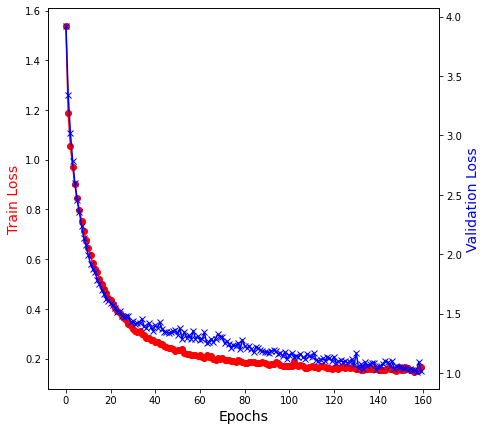

In [145]:
# create figure and axis objects with subplots()
fig,ax = plt.subplots(figsize = (7,7))
# make a plot
ax.plot(loss_plot, color="red", marker="o")
# set x-axis label
ax.set_xlabel("Epochs", fontsize = 14)
# set y-axis label
ax.set_ylabel("Train Loss", color="red", fontsize=14)

# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(val_loss_plot, color="blue", marker="x")
ax2.set_ylabel("Validation Loss", color="blue", fontsize=14)
plt.show()


In [146]:
bleu_1_train = []; bleu_2_train = []; bleu_3_train = []; bleu_4_train = []
meteor_train = []
rouge_1_train = []; rouge_2_train = []; rouge_L_train = []
cider_train = []
scorer_rouge = rouge_scorer.RougeScorer(['rouge1','rouge2', 'rougeL'], use_stemmer=True)
chencherry = SmoothingFunction()

image_dataset_train_numpy = np.array(image_dataset_train)
captions_dataset_train_numpy = np.array(captions_dataset_train)
images = set(image_dataset_train)

train_prediction = {}
counter = 0
for element in images:
    utiles.print_progress(counter, len(images))

    index = np.where(image_dataset_train_numpy == element)
    # data
    image_val = np.load(element)
    reference_captions = captions_dataset_train_numpy[index]
    caption_val_raw = []
    caption_val_split = []
    for el in reference_captions: 
        cap = tokenizer.tokens_to_string(el[1:-1])
        caption_val_raw.append(cap)
        caption_val_split.append(cap.split())
    
    # make prediction
    hidden = decoder.reset_state(batch_size=1)
    features = encoder(image_val)
    dec_input = tf.expand_dims([tokenizer.word_index[MARK_END.strip()]], 0)
    prediction_caption = []

    for i in range(CAPTION_LENGTH):
        predictions, hidden, attention_weights = decoder(dec_input,
                                                         features,
                                                         hidden)

        predicted_id = tf.random.categorical(predictions, 1)[0][0].numpy()
        predicted_word = tf.compat.as_text(tokenizer.index_to_word[predicted_id])
        prediction_caption.append(predicted_word)

        if predicted_word == MARK_END:
            prediction_caption = prediction_caption[:-1]
            break
            
        dec_input = tf.expand_dims([predicted_id], 0)

    # calculate matrics
    # Calculate BLEU-1 score
    bleu_1_train.append(sentence_bleu(caption_val_split, prediction_caption, weights=(1, 0, 0, 0), smoothing_function=chencherry.method1))
    # Calculate BLEU-2 score
    bleu_2_train.append(sentence_bleu(caption_val_split, prediction_caption, weights=(0.5, 0.5, 0, 0), smoothing_function=chencherry.method1))
    # Calculate BLEU-3 score
    bleu_3_train.append(sentence_bleu(caption_val_split, prediction_caption, weights=(1/3, 1/3, 1/3, 0), smoothing_function=chencherry.method1))
    # Calculate BLEU-4 score
    bleu_4_train.append(sentence_bleu(caption_val_split, prediction_caption, weights=(0.25, 0.25, 0.25, 0.25), smoothing_function=chencherry.method1))
    # calculate Meteor
    meteor_train.append(meteor_score(caption_val_split, prediction_caption))
    # rouge score
    for el in caption_val_raw:
        rouge_scores = scorer_rouge.score(el, ' '.join(prediction_caption))
        rouge_1_train.append(rouge_scores['rouge1'].fmeasure)
        rouge_2_train.append(rouge_scores['rouge2'].fmeasure)
        rouge_L_train.append(rouge_scores['rougeL'].fmeasure)

    counter += 1
    key_img = element.split('/')[-1][:-4]
    train_prediction[key_img] =  ' '.join(prediction_caption)

print("#"*20)
print("\tMetrics train set")
print("BLEU-1: ", np.round(np.mean(bleu_1_train),2), '+-', np.round(np.std(bleu_1_train),2))
print("BLEU-2: ", np.round(np.mean(bleu_2_train),2), '+-', np.round(np.std(bleu_2_train),2))
print("BLEU-3: ", np.round(np.mean(bleu_3_train),2), '+-', np.round(np.std(bleu_3_train),2))
print("BLEU-4: ", np.round(np.mean(bleu_4_train),2), '+-', np.round(np.std(bleu_4_train),2))
print("METEOR: ", np.round(np.mean(meteor_train),2), '+-', np.round(np.std(meteor_train),2))
print("ROUGE-1: ", np.round(np.mean(rouge_1_train),2), '+-', np.round(np.std(rouge_1_train),2))
print("ROUGE-2: ", np.round(np.mean(rouge_2_train),2), '+-', np.round(np.std(rouge_2_train),2))
print("ROUGE-L: ", np.round(np.mean(rouge_L_train),2), '+-', np.round(np.std(rouge_L_train),2))

# metrics calculation for validation set
cider_val = []
bleu_1_val = []; bleu_2_val = []; bleu_3_val = []; bleu_4_val = []
meteor_val = []
rouge_1_val = []; rouge_2_val = []; rouge_L_val = []
scorer_rouge = rouge_scorer.RougeScorer(['rouge1','rouge2', 'rougeL'], use_stemmer=True)
chencherry = SmoothingFunction()

image_dataset_val_numpy = np.array(image_dataset_val)
captions_dataset_val_numpy = np.array(captions_dataset_val)
images = set(image_dataset_val)

val_prediction = {}
counter = 0
for element in images:
    utiles.print_progress(counter, len(images))

    index = np.where(image_dataset_val_numpy == element)
    # data
    image_val = np.load(element)
    reference_captions = captions_dataset_val_numpy[index]
    caption_val_raw = []
    caption_val_split = []
    for el in reference_captions: 
        cap = tokenizer.tokens_to_string(el[1:-1])
        caption_val_raw.append(cap)
        caption_val_split.append(cap.split())
    
    # make prediction
    hidden = decoder.reset_state(batch_size=1)
    features = encoder(image_val)
    dec_input = tf.expand_dims([tokenizer.word_index[MARK_END.strip()]], 0)
    prediction_caption = []

    for i in range(CAPTION_LENGTH):
        predictions, hidden, attention_weights = decoder(dec_input,
                                                         features,
                                                         hidden)

        predicted_id = tf.random.categorical(predictions, 1)[0][0].numpy()
        predicted_word = tf.compat.as_text(tokenizer.index_to_word[predicted_id])
        prediction_caption.append(predicted_word)

        if predicted_word == MARK_END:
            prediction_caption = prediction_caption[:-1]
            break
            
        dec_input = tf.expand_dims([predicted_id], 0)

    # calculate matrics
    # Calculate BLEU-1 score
    bleu_1_val.append(sentence_bleu(caption_val_split, prediction_caption, weights=(1, 0, 0, 0), smoothing_function=chencherry.method1))
    # Calculate BLEU-2 score
    bleu_2_val.append(sentence_bleu(caption_val_split, prediction_caption, weights=(0.5, 0.5, 0, 0), smoothing_function=chencherry.method1))
    # Calculate BLEU-3 score
    bleu_3_val.append(sentence_bleu(caption_val_split, prediction_caption, weights=(1/3, 1/3, 1/3, 0), smoothing_function=chencherry.method1))
    # Calculate BLEU-4 score
    bleu_4_val.append(sentence_bleu(caption_val_split, prediction_caption, weights=(0.25, 0.25, 0.25, 0.25), smoothing_function=chencherry.method1))
    # calculate Meteor
    meteor_val.append(meteor_score(caption_val_split, prediction_caption))
    # rouge score
    for el in caption_val_raw:
        rouge_scores = scorer_rouge.score(el, ' '.join(prediction_caption))
        rouge_1_val.append(rouge_scores['rouge1'].fmeasure)
        rouge_2_val.append(rouge_scores['rouge2'].fmeasure)
        rouge_L_val.append(rouge_scores['rougeL'].fmeasure)
    
    key_img = element.split('/')[-1][:-4]
    val_prediction[key_img] =  ' '.join(prediction_caption)
    counter +=1
 
print("#"*20)
print("\tMetrics val set")
print("BLEU-1: ", np.round(np.mean(bleu_1_val),2), '+-', np.round(np.std(bleu_1_val),2))
print("BLEU-2: ", np.round(np.mean(bleu_2_val),2), '+-', np.round(np.std(bleu_2_val),2))
print("BLEU-3: ", np.round(np.mean(bleu_3_val),2), '+-', np.round(np.std(bleu_3_val),2))
print("BLEU-4: ", np.round(np.mean(bleu_4_val),2), '+-', np.round(np.std(bleu_4_val),2))
print("METEOR: ", np.round(np.mean(meteor_val),2), '+-', np.round(np.std(meteor_val),2))
print("ROUGE-1: ", np.round(np.mean(rouge_1_val),2), '+-', np.round(np.std(rouge_1_val),2))
print("ROUGE-2: ", np.round(np.mean(rouge_2_val),2), '+-', np.round(np.std(rouge_2_val),2))
print("ROUGE-L: ", np.round(np.mean(rouge_L_val),2), '+-', np.round(np.std(rouge_L_val),2))
                                          
path_to_save = '/home2/Kacper_captioning/f8_xception_file_va/'

with open(path_to_save + 'train_predictions_units_512.pkl', 'wb') as fp:
    pickle.dump(train_prediction, fp)
with open(path_to_save + 'test_predictions_units_512.pkl', 'wb') as fp:
    pickle.dump(val_prediction, fp)

- Progress: 0.0%

/home/mateusz/anaconda3/envs/framework/lib/python3.7/site-packages/ipykernel_launcher.py:9: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  if __name__ == '__main__':


- Progress: 100.0%####################
	Metrics train set
BLEU-1:  0.58 +- 0.28
BLEU-2:  0.47 +- 0.31
BLEU-3:  0.38 +- 0.31
BLEU-4:  0.31 +- 0.3
METEOR:  0.45 +- 0.26
ROUGE-1:  0.29 +- 0.22
ROUGE-2:  0.12 +- 0.2
ROUGE-L:  0.27 +- 0.22
- Progress: 0.0%

/home/mateusz/anaconda3/envs/framework/lib/python3.7/site-packages/ipykernel_launcher.py:91: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


- Progress: 100.0%####################
	Metrics val set
BLEU-1:  0.29 +- 0.2
BLEU-2:  0.14 +- 0.15
BLEU-3:  0.08 +- 0.1
BLEU-4:  0.06 +- 0.07
METEOR:  0.19 +- 0.16
ROUGE-1:  0.15 +- 0.14
ROUGE-2:  0.03 +- 0.07
ROUGE-L:  0.14 +- 0.14


In [123]:
path_to_save = '/home2/Kacper_captioning/f8_xception_file_va/'

with open(path_to_save + 'train_predictions_units_512.pkl', 'wb') as fp:
    pickle.dump(train_prediction, fp)
with open(path_to_save + 'test_predictions_units_512.pkl', 'wb') as fp:
    pickle.dump(val_prediction, fp)

In [147]:
train_prediction

{'441817653_fbdf83060b': 'man with denim outfit with blue bench',
 '2854959952_3991a385ab': 'running with white ball across grassy field',
 '1499581619_a5f65a882c': 'with sunglasses facing away from approaching suit',
 '3348208268_6d97d951eb': 'shoulder break dancing on red door',
 '2497074804_b4f3e7fd90': 'hands in crosswalk on city street',
 '2995935078_beedfe463a': 'player in fight during game against player',
 '2272823323_3b7291cd47': 'equipment stare to climb',
 '3481859121_3d3e566ec0': 'and girl are texting in front of onlookers',
 '2458862292_466a920ee2': 'with blue hat and cap stands outside car',
 '398413603_166896900f': 'white dog stands on one leg to catch ball',
 '3304030264_da3dd18c7b': 'is taking jump of step in air',
 '2587818583_4aa8e7b174': 'from pillow play while another boy watch as another boy playing in birthday house pit',
 '3644142276_caed26029e': 'youngsters are using harnesses at one leg face',
 '264141937_585320617a': 'wearing money themed costume for money',


In [128]:
train_images['441817653_fbdf83060b']

'/home2/Kacper_captioning/f8_features_xception_va/441817653_fbdf83060b.npy'

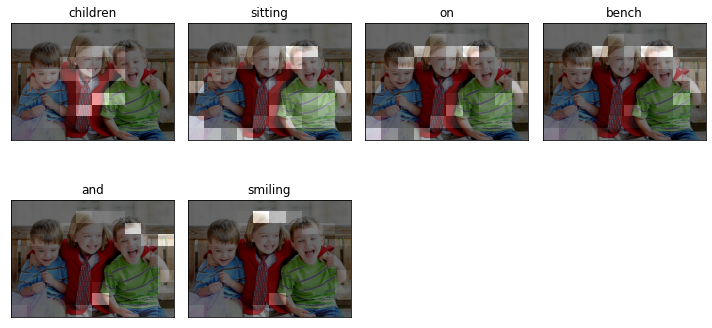

In [30]:
def evaluate(path_to_photo):
    attention_plot = np.zeros((CAPTION_LENGTH, attention_features_shape))

    hidden = decoder.reset_state(batch_size=1)

    img_tensor = np.load(path_to_photo)
    features = encoder(img_tensor)
    dec_input = tf.expand_dims([tokenizer.word_index[MARK_END.strip()]], 0)
    result = []

    for i in range(CAPTION_LENGTH):
        predictions, hidden, attention_weights = decoder(dec_input,
                                                         features,
                                                         hidden)

        attention_plot[i] = tf.reshape(attention_weights, (-1, )).numpy()

        predicted_id = tf.random.categorical(predictions, 1)[0][0].numpy()
        predicted_word = tf.compat.as_text(tokenizer.index_to_word[predicted_id])
        result.append(predicted_word)

        if predicted_word == MARK_END:
            return result, attention_plot

        dec_input = tf.expand_dims([predicted_id], 0)

    attention_plot = attention_plot[:len(result), :]
    return result, attention_plot

result, attention_plot = evaluate(train_images['3479050296_65bcea69a0'])

temp_image = np.array(Image.open(PATH_FLICKR8k_IMAGES+'/3479050296_65bcea69a0.jpg'))
fig = plt.figure(figsize=(10, 10))

len_result = len(result)
for i in range(len_result-1):
    temp_att = np.resize(attention_plot[i], (int(np.sqrt(attention_features_shape)), int(np.sqrt(attention_features_shape))))
    grid_size = max(int(np.ceil(len_result/2)), 2)
    ax = fig.add_subplot(grid_size, grid_size, i+1)
    ax.set_title(result[i])
    img = ax.imshow(temp_image)
    ax.imshow(temp_att, cmap='gray', alpha=0.6, extent=img.get_extent())
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.tight_layout()
plt.show()

In [31]:
import gensim

In [32]:
gensim.__version__

'4.2.0'